Christiaan van Roon - 11122854  
Sander Hansen - 10995080

In [23]:
#Pylab inline is not a good habit to use
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

# Bayes Classifier

## 4.3 Minimum Error Classification I

In a previous section enough information is given to make the figure illustrating the minimum error
classification. But not all formula’s are given there. . . Write a program to draw the curves that are
shown in figure 2. In case you don’t feel like programming then at least give all formula’s needed to
draw the curves  
(hint: how to calculate the evidence pdf $p_X(x)$?)

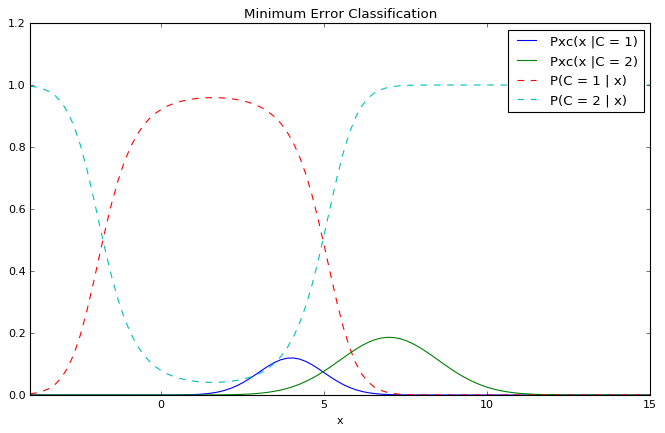

In [24]:
#Probability density function
def pdf(sigma, mu, x):
    return (1 / (sigma * sqrt(2 * pi))) * exp(-1 * power(x - mu, 2) / (2 * power(sigma, 2)))

#Posterior function
def posterior(sigma, mu, p_x, x, p_c):
    return (pdf(sigma, mu, x) * p_c) / p_x
    

fig = pyplot.figure(figsize=(10, 6), dpi=80, facecolor='white')
t = linspace(-4, 15, 100)
y1 = pdf(1, 4, t) * 0.3
y2 = pdf(1.5, 7, t) * 0.7

p_x = y1 + y2
y3 = posterior(1, 4, p_x, t, 0.3)
y4 = posterior(1.5, 7, p_x, t, 0.7)

#Plot all data
plot(t, y1, label='Pxc(x |C = 1)')
plot(t, y2, label='Pxc(x |C = 2)')
plot(t, y3, label='P(C = 1 | x)', linestyle='dashed')
plot(t, y4, label='P(C = 2 | x)', linestyle='dashed')

axis([-4, 15, 0, 1.2])
title('Minimum Error Classification')
legend(loc='upper right')
xlabel('x')

show()


The formulas that are used to draw the figure above:
$$P_{XC}(x\ |\ C=1) = p(x\ |\ C = 1)P(1)$$
$$P_{XC}(x\ |\ C=1) = p(x\ |\ C = 1) * 0.3$$  
  
  
$$P_{XC}(x\ |\ C=2) = p(x\ |\ C = 2)P(2)$$
$$P_{XC}(x\ |\ C=2) = p(x\ |\ C = 2) * 0.7$$
  
   
$$P(C = 1\ |\ x) = \frac{p(x\ | C = 1)P(1)}{P(x)}$$  
  
  
$$P(C = 2\ |\ x) = \frac{p(x\ | C = 2)P(2)}{p(x)}$$

where $$p(x) = \sum_{i = 1}^{c} p(x\ |\ C_i)p(C_i)$$

## 4.4 Minimum Error Classification II

* In this exercise you have to implement a MAP classifier (minimum error classifier) for the Iris dataset.
* Assume that the feature vectors are class conditionally distributed according to a 4 dimensional normal distribution (characterized with mean vector µ and covariance matrix Σ. The parameters for these distributions can be estimated from the learning set.)
* Test your classifier on the test set

In [25]:
#Convert the class names to ints
def convert_classes(class_name):
    class_name=class_name.decode()
    mapping = {'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
    return mapping[class_name]

def normal_pdf(sigma, mu, x):
    return (1 / (sigma * sqrt(2 * pi)) * 
            e**(-1*((x - mu)**2)/(2*sigma**2)))
        
#Read in data and convert the class names to floats
data = loadtxt('iris.data', delimiter=',', dtype=float, converters={4: convert_classes})
data_copy = []
data_copy[:] = data

#Shuffle data for test and traing usage
shuffle(data_copy)

#Use 70% as traing data
boundary = int(0.7 * shape(data)[0])
train_data = array(data_copy[:boundary])
test_data = array(data_copy[boundary:])

#Seperate train_data
class_1 = train_data[train_data[:, 4] == 1]
class_2 = train_data[train_data[:, 4] == 2]
class_3 = train_data[train_data[:, 4] == 3]

#Calculate mean of every feature ,class separated
means = []
means.append([mean(class_1[:,0]), mean(class_1[:,1]), mean(class_1[:,2]), mean(class_1[:,3])])
means.append([mean(class_2[:,0]), mean(class_2[:,1]), mean(class_2[:,2]), mean(class_2[:,3])])
means.append([mean(class_3[:,0]), mean(class_3[:,1]), mean(class_3[:,2]), mean(class_3[:,3])])

#Calculate the covariance matrix of every classifier
covariance_1 = array([cov(transpose(class_1)[0]), cov(transpose(class_1)[1]), cov(transpose(class_1)[2]), cov(transpose(class_1)[3])])
covariance_2 = array([cov(transpose(class_2)[0]), cov(transpose(class_2)[1]), cov(transpose(class_2)[2]), cov(transpose(class_2)[3])])
covariance_3 = array([cov(transpose(class_3)[0]), cov(transpose(class_3)[1]), cov(transpose(class_3)[2]), cov(transpose(class_3)[3])])

#Calculate pdf
y1 = normal_pdf(covariance_1, means[0], test_data[:,:4])
y2 = normal_pdf(covariance_2, means[1], test_data[:,:4])
y3 = normal_pdf(covariance_3, means[2], test_data[:,:4])

y1 = [sum(a) for a in y1]
y2 = [sum(a) for a in y2]
y3 = [sum(a) for a in y3]

wrong_count = 0
for i in range(len(y1)):
    class_guess = [y1[i], y2[i], y3[i]].index(amax([y1[i], y2[i], y3[i]])) + 1
    if(class_guess != test_data[i][4]):
        wrong_count += 1
    
print(str(wrong_count) + ' out of ' + str(len(test_data)) + ' are classified wrong')


17 out of 45 are classified wrong


   # k-NN Classifier

From the handout Exercise 4.2 has to be made and reported in an IPython notebook.

In [26]:
class NNb:
    def __init__(self, X, c):
        self.n, self.N = X.shape
        self.X = X
        self.c = c

    def classify(self, x, k):
        d = self.X - tile(x.reshape(self.n,1), self.N);
        dsq = sum(d*d,0)
        
        indices = dsq.argsort()[:k]
        result = np.argmax(np.bincount(self.c[indices].astype(int)))
        
        return result

First we will test it on the iris dataset

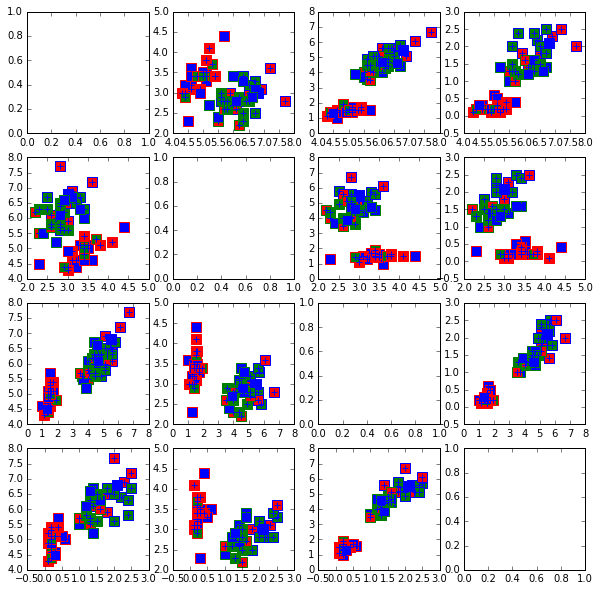

In [27]:
k = 2

ind = arange(150) # indices into the dataset
ind = permutation(ind) # random permutation
L = ind[0:90] # learning set indices

T = ind[90:] # test set indices

# Learning Set
X = transpose(data[L,0:4])
nnc = NNb(X, data[L,-1])

# Classification of Test Set
c = zeros(len(T))
for i in arange(len(T)):
    c[i] = nnc.classify(data[T[i],0:4], k)

# Confusion Matrix
CM = zeros((3,3))
for i in range(3):
    for j in range(3):
        CM[i,j] = sum( logical_and(data[T,4]==(i+1),c==(j+1)) )

plt.figure(figsize=(10,10))

# Plot Test Set
figure(1)
color = array( ["red", "green", "blue"])
for i in range(4):
    for j in range(4):
        subplot(4,4,4*i+j+1)
        if i==j:
            continue
        plt.scatter(data[T,i], data[T,j], s=100, marker="s",
                    edgecolor=color[data[T,4].astype(int)-1],
                    facecolor=["red","green","blue"]*len(T))
        plt.scatter(data[T,i], data[T,j], s=30, marker="+",
                    edgecolor=color[c.astype(int)-1])
    
plt.show()

In [45]:
a1 = 0
a1p2 = 0
a1p3 =0
a2 = 0
a2p1 = 0
a2p3 = 0
a3 = 0
a3p1 = 0
a3p2 = 0

total = len(T)

for i in arange(len(T)):
    if data[T[i],-1] == c[i]:
        if c[i] == 1:
            a1 += 1
        elif c[i] == 2:
            a2 += 1
        else:
            a3 += 1
    else:
        if data[T[i], -1] == 1: 
            if c[i] == 2:
                a1p2 += 1
            else:
                a1p3 += 1
        elif data[T[i], -1] == 2:
            if c[i] == 1:
                a2p1 += 1
            else:
                a2p3 += 1
        else:
            if c[i] == 1:
                a3p1 += 1
            else:
                a3p2 += 1

print("Confusion matrix of current k = %d" %(k))
print("\t\tPredicted 1 \tPredicted 2 \tPredicted3")
print("Real 1\t\t%d\t\t%d\t\t%d" %(a1, a1p2, a1p3))
print("Real 2\t\t%d\t\t%d\t\t%d" %(a2p1, a2, a2p3))
print("Real 3\t\t%d\t\t%d\t\t%d" %(a3p1, a3p2, a3))

Confusion matrix of current k = 2
		Predicted 1 	Predicted 2 	Predicted3
Real 1		25		0		0
Real 2		0		18		3
Real 3		0		0		14


 # k-Means Clustering

Write a Python/Numpy function kmeans for k-Means clustering. The number kk should be a parameter.

The arguments for function kmeans should be the dataset X (an array with the feature vectors as rows) and the number k. The function should return a vector y such that y[i] is the assigned cluster for feature vector X[i].

Look at Wikipedia to learn what k-means clustering is all about (in case you have not been attending lectures).

Make up your own 2D data set to test your clustering algorithm (you may get some inspiration from the xor like data set that was generated in the exercise on logistic regression). Make sure you give details on the choice of the initial cluster centers.



In [29]:
X0 = vstack((random.randn(50,2), random.randn(50,2) + array([6,6])))
X1 = vstack((random.randn(50,2) + array([6,0]), random.randn(50,2) + array([0,6])))
X = vstack((X0, X1))
y = hstack((zeros(100), ones(100)))

In [30]:
#Initialize k random centroids
def init_centroids(X, k):
    points = choice(arange(len(X)), k)
    centroids = X[points, :]
    return centroids

#Calculate the distance between two points using pythagoras
def calc_distance(x1, x2):
    return sqrt(abs(x1[0] - x2[0]) ** 2 + abs(x1[1] - x2[1]) ** 2)
    
#Kmeans function
def kmeans(X, k):
    centroids = init_centroids(X,k)
    
    for i in range(100):
       
        #Use two forloops, one to determine closest centroid, one to move to centroid
        clustering = array(list())
        for point in X:
            distance_centroid = list()
            for y in centroids:
                distance_centroid.append(calc_distance(point, y))
            clustering = np.append(clustering, np.argmin(distance_centroid))
            
        #Move the centroids
        centroids = [X[clustering == k_i].mean(axis=0) for k_i in range(k)]

    return array(centroids), array(clustering)

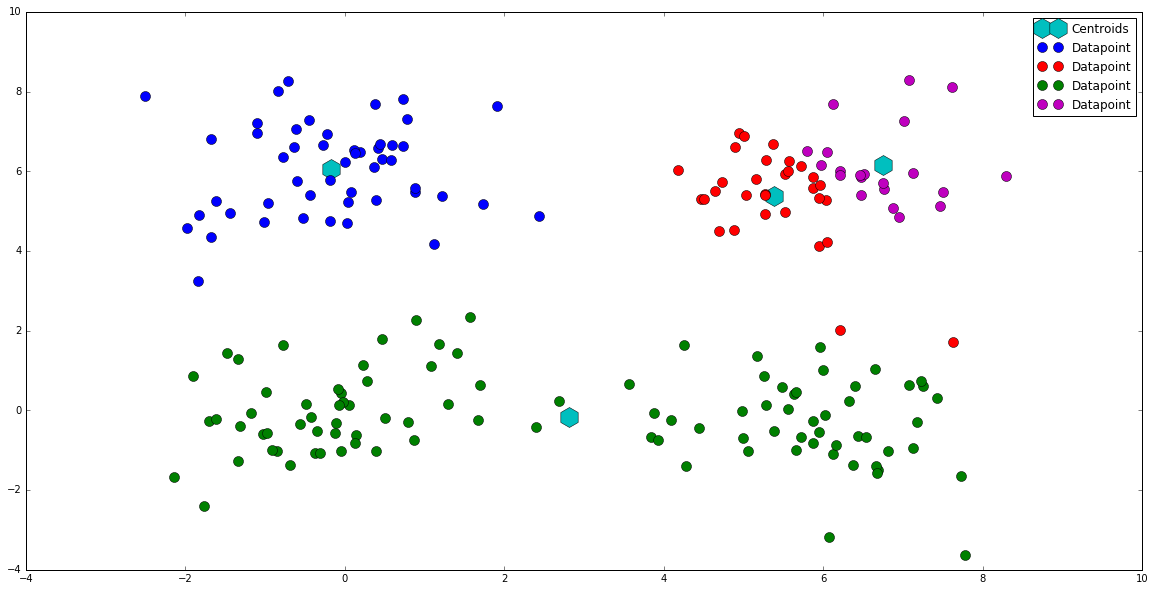

In [31]:
#Plot the points
figure(figsize=(20,10))
centroids , C = kmeans(X, 4)

#Plot the centroids
plot(centroids[:,0],centroids[:,1], 'hc', markersize=20, label='Centroids')

plot(X[C == 0, 0], X[C == 0, 1], 'ob', label='Datapoint' , markersize=10)
plot(X[C == 1, 0], X[C == 1, 1], 'or', label='Datapoint' , markersize=10)
plot(X[C == 2, 0], X[C == 2, 1], 'og', label='Datapoint' , markersize=10)
plot(X[C == 3, 0], X[C == 3, 1], 'om', label='Datapoint' , markersize=10)
legend(loc='upper right')
show()